In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_theme()

In [63]:
E_commerce_data = pd.read_csv("F:\\@BDA\\PDS\\PROJECT\\SURVEY_DATA_ON_ECOMMERCE_SITES.csv")

In [64]:
E_commerce_data = E_commerce_data.rename({"Highest Educational Qualification":"Qualification",
                                         "On a scale of 0-5, how much does an overall product rating affect your purchase decision?":"Purchase_Decision"}, axis = 1)

In [65]:
data = pd.DataFrame(columns=["Qualification", "Purchase_decision", "Count"])

In [66]:
data.Qualification = E_commerce_data.Qualification
data.Purchase_decision = E_commerce_data.Purchase_Decision
data.Count = 1

In [67]:
data

,Qualification,Purchase_decision,Count
0,Graduate,4,1
1,Graduate,4,1
2,Graduate,4,1
3,Graduate,4,1
4,Higher Secondary,4,1
...,...,...,...
121,Graduate,4,1
122,Graduate,3,1
123,Post Graduate and above,5,1
124,Post Graduate and above,4,1


In [68]:
grouped_data = data.groupby(["Qualification", "Purchase_decision"]).sum(); grouped_data

Count
Qualification           Purchase_decision       
Graduate                2                      2
                        3                     22
                        4                     43
                        5                     13
Higher Secondary        3                      4
                        4                      9
                        5                      8
Post Graduate and above 0                      1
                        3                      5
                        4                      8
                        5                      2
Secondary               1                      1
                        3                      3
                        4                      3
                        5                      2

In [69]:
data2 = pd.DataFrame(columns=["Qualification", "Purchase_decision"])
row_list = []
for i,j in grouped_data.index:
    dict1 = {}
    dict1.update({"Qualification": i, "Purchase_decision":j})
    row_list.append(dict1)
df1 = pd.DataFrame(row_list); df1
df1["count"]  = list(grouped_data.Count); df1

,Qualification,Purchase_decision,count
0,Graduate,2,2
1,Graduate,3,22
2,Graduate,4,43
3,Graduate,5,13
4,Higher Secondary,3,4
5,Higher Secondary,4,9
6,Higher Secondary,5,8
7,Post Graduate and above,0,1
8,Post Graduate and above,3,5
9,Post Graduate and above,4,8


In [70]:
df2 = pd.DataFrame(0,columns=[0,1,2,3,4,5], index = ["Secondary", "Higher Secondary", "Graduate", "Post Graduate and above"])

In [71]:
k = 0
for i,j in zip(list(df1.Qualification), list(df1.Purchase_decision)):
    df2.at[str(i),j] = df1["count"][k]
    k = k+1

In [72]:
df2 = df2.div(df2.sum(axis=1), axis = 0)

In [73]:
df2 = df2*100

In [74]:
 df2['Qualification'] = list(df2.index); df2

,0,1,2,3,4,5,Qualification
Secondary,0.00,11.111111,0.0,33.333333,33.333333,22.222222,Secondary
Higher Secondary,0.00,0.000000,0.0,19.047619,42.857143,38.095238,Higher Secondary
Graduate,0.00,0.000000,2.5,27.500000,53.750000,16.250000,Graduate
Post Graduate and above,6.25,0.000000,0.0,31.250000,50.000000,12.500000,Post Graduate and above


In [75]:
for i,j in zip(list(df1.Qualification), list(df1.Purchase_decision)):
    print("i = " ,i, "j = ",j)

i =  Graduate j =  2
i =  Graduate j =  3
i =  Graduate j =  4
i =  Graduate j =  5
i =  Higher Secondary j =  3
i =  Higher Secondary j =  4
i =  Higher Secondary j =  5
i =  Post Graduate and above j =  0
i =  Post Graduate and above j =  3
i =  Post Graduate and above j =  4
i =  Post Graduate and above j =  5
i =  Secondary j =  1
i =  Secondary j =  3
i =  Secondary j =  4
i =  Secondary j =  5


In [76]:
df2 = df2.fillna(0)

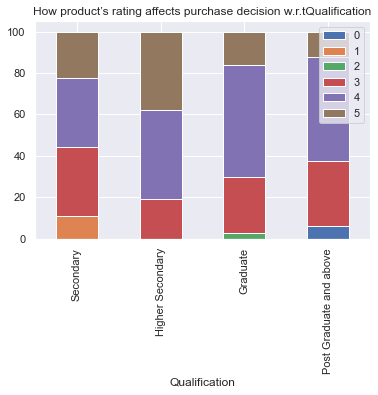

In [87]:
df2.plot(x="Qualification", kind='bar', stacked=True,
        title='How product’s rating affects purchase decision w.r.tQualification')
plt.savefig("6.png")